# PFRA 

### _Development Notebook_
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.

In [1]:
model_s3path = "s3://azavea/jwx_test/data/zip/P03_P04_100yr.zip"

In [2]:
import sys;sys.path.append('../')
import gdal
from hecrasio.core import *
from hecrasio.qaqc import *
import scrapbook as sb

In [3]:
global_errors=[]

#### Read model output data 

*from AWS*

In [4]:
try:
    model = ResultsZip(model_s3path, pfra=False, require_prj=False)
except:
    error = 'Failed to read model: ResultsZip error'
    global_errors.append(error)
    print(error)
    
try:
    hdfResults_path = pull_result_paths(model)
except AssertionError as e:
    global_errors.append(str(e))
    print(e)
    
try:
    rasPlan = HDFResultsFile(model, model_s3path, hdfResults_path)
except:
    error = 'Failed to read RAS plan: rasPlan error'
    global_errors.append(error)
    print(error)

Single domain found...


### 1A. Plan Information

In [5]:
try:
    sb.glue(rasPlan.Plan_Information.to_json(), "json")
    rasPlan.Plan_Information
except:
    error = 'Failed to glue Plan Information'
    global_errors.append(error)
    print(error)

### 1B. Plan Parameters

In [6]:
try:
    sb.glue(rasPlan.Plan_Parameters.to_json(), "json")
    rasPlan.Plan_Parameters
except:
    error = 'Failed to glue Plan Parameters'
    global_errors.append(error)
    print(error)

### 1C. Boundary Conditions 

#### Input hydrographs

"Unable to open object (object 'Flow Hydrographs' doesn't exist)"


/home/jwall/anaconda3/envs/geos/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


Domain ID: D02, Average Cell Size = 150.0


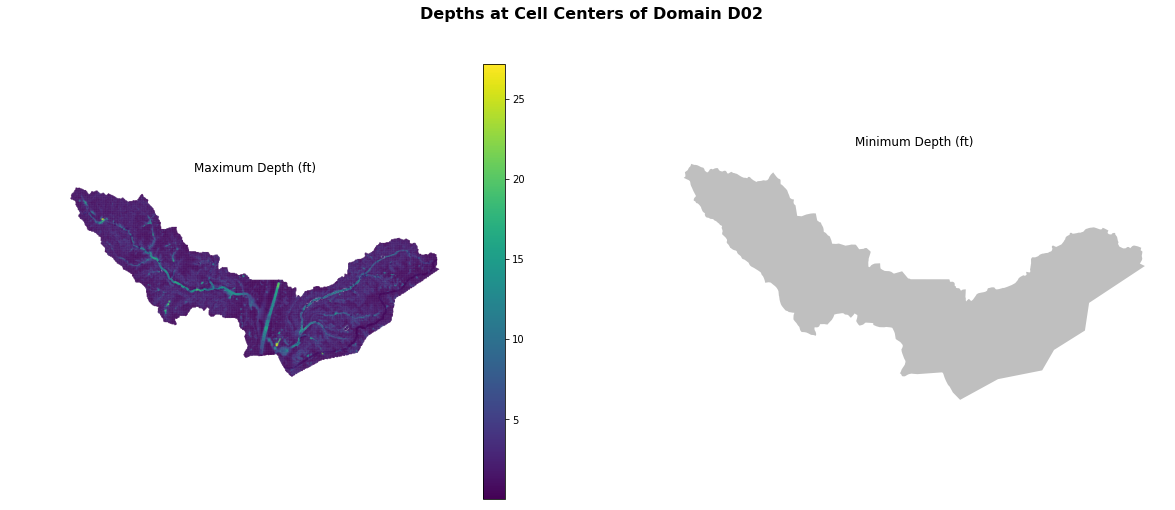

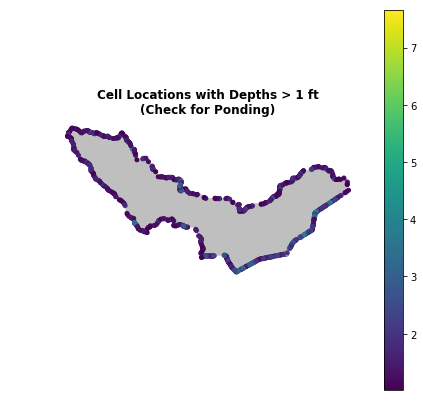

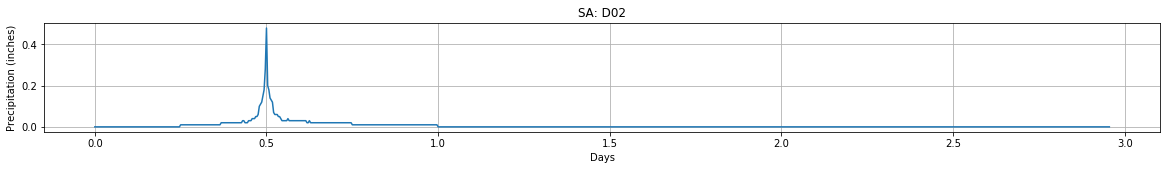

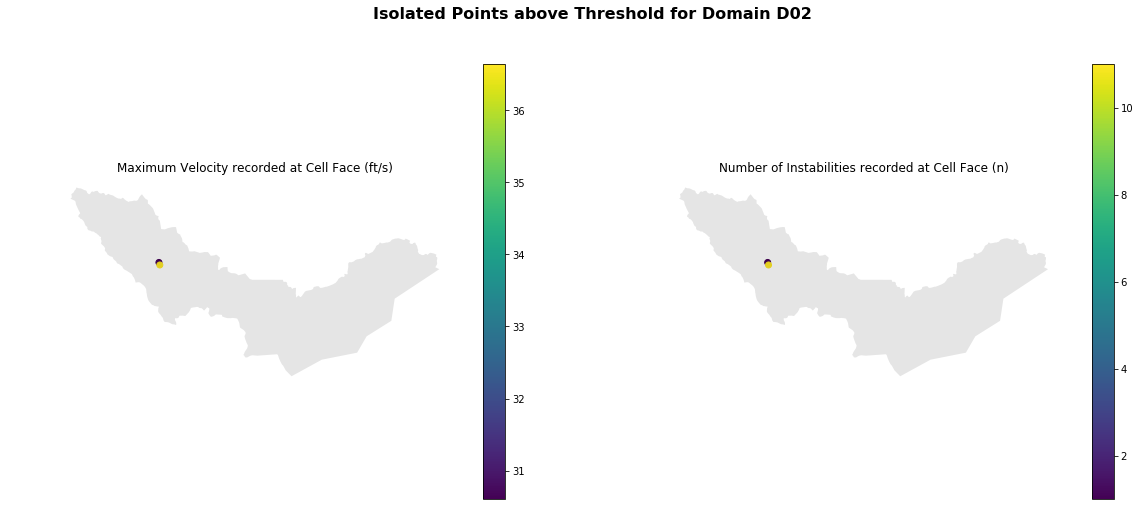

In [7]:
try:
    results_data = show_results(rasPlan.domains, model, rasPlan)
except:
    error = 'Failed to Show Results'
    global_errors.append(error)
    print(error)

try:
    sb.glue(results_data.to_json(), "json")
except:
    error = 'Failed to glue Results Data'
    global_errors.append(error)
    print(error)

### 2A. Computational Summary

In [8]:
try:
    non_nan = rasPlan.summary.replace(np.nan, "00:00:00")
    sb.glue(non_nan.to_json(), "json")
    rasPlan.summary
except:
    error = 'Failed to glue Plan Summary'
    global_errors.append(error)
    print(error)

In [9]:
try:
    if len(global_errors) > 1:
        sb.glue("Global Errors", global_errors)
        print('Global errors have been glued!')
    else:
        print("No global errors identified.")
except:
    print('Gluing errors failed.')

No global errors identified.


# END